## Miler per Gallon(MPG) Prediction

### 1. Setting up the dataset repository

In [1]:
!mkdir data

In [2]:
!unzip data/archive.zip -d data/

Archive:  data/archive.zip
  inflating: data/MetroPT3(AirCompressor).csv  


## 2. EDA

In [4]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('data/MetroPT3(AirCompressor).csv')
df.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [6]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')

In [7]:
df.shape

(1516948, 17)

In [9]:
df.describe??

In [8]:
df.describe()

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06
mean,7.584735e+06,1.367826e+00,8.984611e+00,7.568155e+00,5.595619e-02,8.985233e+00,6.264418e+01,2.050171e+00,8.369568e-01,1.606106e-01,9.198483e-01,8.326640e-01,3.420025e-03,9.914368e-01,9.041556e-01,9.371066e-01
std,4.379053e+06,3.250930e+00,6.390951e-01,3.333200e+00,3.824015e-01,6.383070e-01,6.516261e+00,2.302053e+00,3.694052e-01,3.671716e-01,2.715280e-01,3.732757e-01,5.838091e-02,9.214078e-02,2.943779e-01,2.427712e-01
min,0.000000e+00,-3.200000e-02,7.300000e-01,-3.600000e-02,-3.200000e-02,7.120000e-01,1.540000e+01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.792368e+06,-1.400000e-02,8.492000e+00,8.254000e+00,-2.200000e-02,8.494000e+00,5.777500e+01,4.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,7.584735e+06,-1.200000e-02,8.960000e+00,8.784000e+00,-2.000000e-02,8.960000e+00,6.270000e+01,4.500000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.137710e+07,-1.000000e-02,9.492000e+00,9.374000e+00,-1.800000e-02,9.492000e+00,6.725000e+01,3.807500e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.516947e+07,1.067600e+01,1.030200e+01,1.028800e+01,9.844000e+00,1.030000e+01,8.905000e+01,9.295000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


**Plot the boxplot for BHK, Size, Bathroom, and Rent.**

A Box plot is a way to visualize the distribution of the data by using a box and some vertical lines. It is known as the whisker plot. The data can be distributed between five key ranges, which are as follows:

- Minimum: Q1-1.5*IQR
- 1st quartile (Q1): 25th percentile
- Median:50th percentile
- 3rd quartile(Q3):75th percentile
- Maximum: Q3+1.5*IQR
- Here IQR represents the InterQuartile Range which starts from the first quartile (Q1) and ends at the third quartile (Q3).

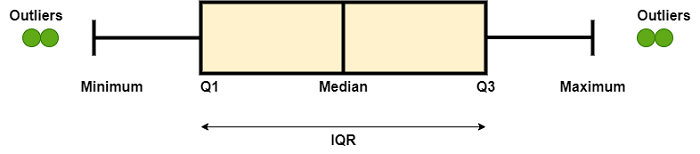

Source: [Boxplot](https://www.javatpoint.com/box-plot-in-python-using-matplotlib)

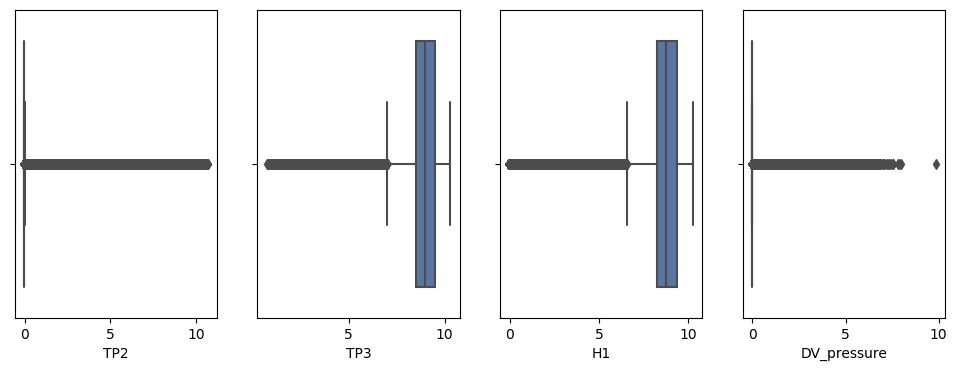

In [10]:
#@title [Click here to see the solution.]
fig, ax = plt.subplots(1, 4, figsize=(12, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["TP2", "TP3", "H1","DV_pressure"]):
    sns.boxplot(x=df[col], ax=ax[axid])

**REMOVING OUTLIERS**

In [13]:
Q1 = df['H1'].quantile(0.25)
Q3 = df['H1'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered = df[(df['H1'] >= lower_bound) & (df['H1'] <= upper_bound)]
df.shape
df_filtered.shape

(1275621, 17)

**Is there a correlation between H1 and Caudal_impulses**

<Axes: xlabel='COMP', ylabel='MPG'>

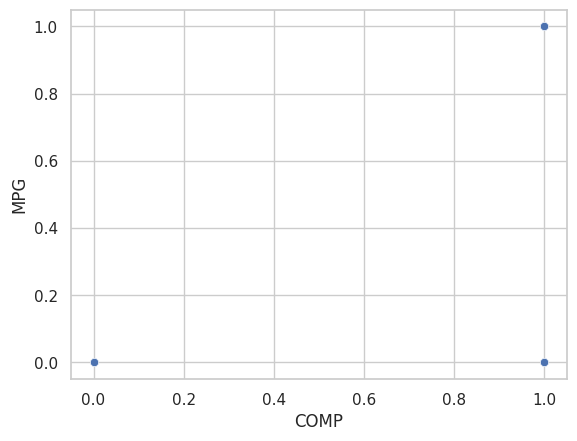

In [22]:
sns.scatterplot(x=df["COMP"], y=df["MPG"])

**Null Values in the dataset?**

In [11]:
df.isnull().sum()

Unnamed: 0         0
timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64

We can use a **categorical variable** to encode the City and Furnishing Status.

In [30]:
from sklearn import preprocessing

## Let us now split the dataset into train-val-test sets.

In [ ]:
df.head(3)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Recency,city_cat,furnishing_cat,tenent_pref_cat,areatype_cat
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,92,4,2,1,2
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,97,4,1,1,2
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,94,4,1,1,2


In [24]:
data_df = df[["TP2", "H1", "COMP", "Motor_current", "DV_eletric", "Towers", "MPG"]]
data_df.head()

,TP2,H1,COMP,Motor_current,DV_eletric,Towers,MPG
0,-0.012,9.340,1.0,0.0400,0.0,1.0,1.0
1,-0.014,9.332,1.0,0.0400,0.0,1.0,1.0
2,-0.012,9.322,1.0,0.0425,0.0,1.0,1.0
3,-0.012,9.312,1.0,0.0400,0.0,1.0,1.0
4,-0.012,9.302,1.0,0.0400,0.0,1.0,1.0


<Axes: >

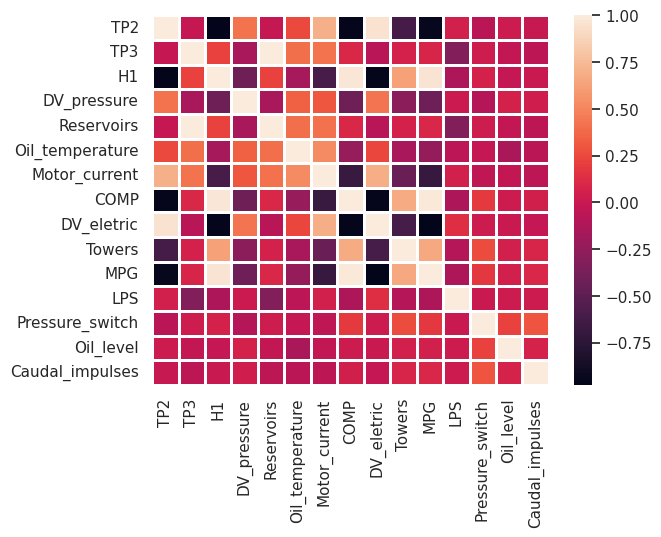

In [20]:
new_df = df[["TP2", "TP3", "H1", "DV_pressure", "Reservoirs", "Oil_temperature", "Motor_current", "COMP", "DV_eletric", "Towers","MPG","LPS","Pressure_switch","Oil_level","Caudal_impulses"]]
sns.heatmap(data=new_df.corr(), lw = 1)